# Gravitional Orbits in Cartesian Coordinates 
We solve for the orbits governed by the gravitational potential 

## We've two particles, each at their respective positions 

$\begin{align} 
   (x_{1}, y_{1}) 
\end{align}$

### and 

$\begin{align} 
   (x_{2}, y_{2}) 
\end{align}$


### Their respective Kinetic energy is given by: 

$\begin{align} 
   T_{1} = \frac12 m_{1} v_{1}^2
\end{align}$

$\begin{align} 
   T_{2} = \frac12 m_{2} v_{2}^2
\end{align}$

Where 

$\begin{align} 
   \vec v^2 =  \dot x^2 + \dot y^2
\end{align}$


### The graviational potential energy between the two particles is given by 

$\begin{align} 
   U = \frac {-G m_{1} m_{2}} {r}
\end{align}$

where 

$\begin{align} 
   r = \sqrt{ (x_{2} - x_{1})^2 + (y_{2} - y_{1})^2 }
\end{align}$


#### Then, we get Lagrangian as: 
$\begin{align} 
    \mathcal{L} = T_{total} - U = \frac12 m_{1} v_{1}^2 + \frac12 m_{2} v_{2}^2 + \frac {G m_{1} m_{2}} {r}
\end{align}$

#### which then gives us our equation motions for each of the coordinates


In [9]:
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [29]:
class Gravitational_Orbits():
    
    """
    Class to implement the lagragian for a two body gravitational problem, using the following defined parameters.
    
    Parameters:
    
    m1 : float
        mass of the first object
    m2: float
        mass of the second object
    G: float
        Gravitational Constant 
    
    ----------
    
    Methods:
    
    dz_dt(t, z):
        This function returns the right hand side of the differential equation in vector z, using given time t \
        and coressponding values of z. 
    
    
    """
    
    def __init__(self, m1, m2, G):
        
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
        
    def dz_dt(self, t, z):
        """
        Parameters: 
        t: float
            time
        z: float
            This is an 8 component vector comprising of the following values:
            
            z[0] = x1(t) and z[1] = x1_dot(t)
            z[2] = y1(t) and z[3] = y1_dot(t)
            z[4] = x2(t) and z[5] = x2_dot(t)
            z[6] = y2(t) and z[6] = y2_dot(t)
            
            Here, the x and y are space coordinates, and the x_dot, y_dot are their corresponding time \ 
            derivatives                                        
        
        """
        r_12 = np.sqrt((z[0]-z[4])**2 + (z[2]-z[6])**2)
    
        return [\
                z[1], self.G * self.m2 * (z[4]-z[0]) / r_12**3, \
                z[3], self.G * self.m2 * (z[6]-z[2]) / r_12**3, \
                z[5], -self.G * self.m1 * (z[4]-z[0]) / r_12**3, \
                z[7], -self.G * self.m1 * (z[6]-z[2]) / r_12**3,                                 
               ]
    
    def solve_ode(self, t_pts, z0, abserr=1.e-10, relerr = 1.e-10):
        
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), z0, t_eval = t_pts, \
                            method = "RK23", atol=abserr, rtol=relerr)
        
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        
        
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot 
        
        
        
    def solve_ode_leapfrog_1(self, t_pts, z0):
        
        delta_t = t_pts[1] - t_pts[0]
        
        x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0 = z0
        
#         num_z0 = len(z0)
        num_t_pts = len(t_pts)
    
        x1 = np.zeros(num_t_pts)
        x1_dot = np.zeros(num_t_pts)
        x1_dot_half = np.zeros(num_t_pts)
        
        y1 = np.zeros(num_t_pts)
        y1_dot = np.zeros(num_t_pts)
        y1_dot_half = np.zeros(num_t_pts)
        
        
        x2 = np.zeros(num_t_pts)
        x2_dot = np.zeros(num_t_pts)
        x2_dot_half = np.zeros(num_t_pts)
        
        y2 = np.zeros(num_t_pts)
        y2_dot = np.zeros(num_t_pts)
        y2_dot_half = np.zeros(num_t_pts)
        
        
        #initial conditions 
        x1[0] = x1_0
        x1_dot[0] = x1_dot_0
        
        y1[0] = y1_0
        y1_dot[0] = y1_dot_0
        
        x2[0] = x2_0
        x2_dot[0] = x2_dot_0
        
        y2[0] = y2_0
        y2_dot[0] = y2_dot_0
        
        
        
        for i in np.arange(len(t_pts) - 1):
            
            t = t_pts[i]
            
            z = [x1[i], x1_dot[i], y1[i], y1_dot[i], \
                x2[i], x2_dot[i], y2[i], y2_dot[i]]
            
            out = self.dz_dt(t,z)
            
            x1_dot_half[i] = x1_dot[i] + out[1] * delta_t/2
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            
            y1_dot_half[i] = y1_dot[i] + out[3] * delta_t/2
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t
            
            x2_dot_half[i] = x2_dot[i] + out[5] * delta_t/2
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t
            
            y2_dot_half[i] = y2_dot[i] + out[7] * delta_t/2
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t
            
            
            z = [x1[i+1], x1_dot[i], y1[i+1], y1_dot[i], \
                x2[i+1], x2_dot[i], y2[i+1], y2_dot[i]]
            
            out = self.dz_dt(t,z)
            
            x1_dot[i+1] = x1_dot_half[i] + out[1] * delta_t/2
            y1_dot[i+1] = y1_dot_half[i] + out[3] * delta_t/2
            x2_dot[i+1] = x2_dot_half[i] + out[5] * delta_t/2
            y2_dot[i+1] = y2_dot_half[i] + out[5] * delta_t/2
            
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot
       
    
    def solve_ode_leapfrog(self, t_pts, z0):
        
        delta_t = t_pts[1] - t_pts[0]
        
        num_z0 = len(z0)
        num_t_pts = len(t_pts)
        
        z = np.zeros(shape = (num_z0, num_t_pts))
        
        dot_half = np.zeros(int(num_z0/2))
        
        z[:,0] = z0 
        
        for i in np.arange(len(t_pts) - 1):
            
            t_now = t_pts[i]
            
            z_now = z[: , i]
            
            out = np.asarray(self.dz_dt(t_now, z_now))
            
            dot_half = z_now[1::2] + out[1::2] * delta_t/2
            
            z[0::2, i+1] = z_now[0::2] + dot_half * delta_t
            
            
            
            z_now = z[0::2, i+1]
            out = np.asarray(self.dz_dt(t_now, z_now))
            
            z[1::2, i+1] = dot_half + out[1::2] * delta_t/2
        
        return z
            
    

In [30]:
#Plot function 
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line 

In [31]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [32]:
#Labels 
orbit_labels = (r'$x$', r'$y$')

In [33]:
#time array
t_start = 0.
t_end = 10. 
delta_t = 0.001

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

In [34]:
#initial conditions
G = 1.
m1 = 1.
m2 = 5.

orbit1 = Gravitational_Orbits(m1, m2, G)

In [35]:
#Initial conidtions for position and velocity 

x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.

x2_0, x2_dot_0 = -(m1/m2) * x1_0, (-m1/m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1/m2) * y1_0, (-m1/m2) * y1_dot_0 #Go over this from the video

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]


#Send to the solve_ode function 

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit1.solve_ode(t_pts, z_0)


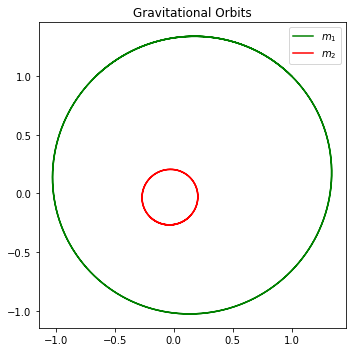

In [36]:
#For plotting 

fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)

ax.plot(x1, y1, color='green', label=r'$m_1$')
ax.plot(x2, y2, color='red', label=r'$m_2$')

ax.set_title("Gravitational Orbits")
ax.legend()
#ax.set_aspect(1)

fig.tight_layout()


In [37]:
#Now try for different masses, where m2>>m1

G = 1.
m1 = 1.
m2 = 20. #m2 >> m1

orbit2 = Gravitational_Orbits(m1, m2, G)

In [38]:
#Initial conidtions for position and velocity 

x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.

x2_0, x2_dot_0 = -(m1/m2) * x1_0, (-m1/m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1/m2) * y1_0, (-m1/m2) * y1_dot_0 #Go over this from the video

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]


#Send to the solve_ode function 

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit2.solve_ode(t_pts, z_0)


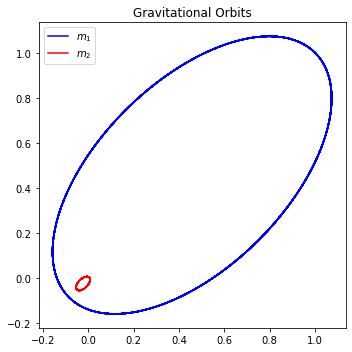

In [39]:
#For plotting 

fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)

ax.plot(x1, y1, color='blue', label=r'$m_1$')
ax.plot(x2, y2, color='red', label=r'$m_2$')

ax.set_title("Gravitational Orbits")
ax.legend()
#ax.set_aspect(1)

fig.tight_layout()


### We see how with m2>> m1, the orbits go from being circular to looking more like an ellipse, which is what we expected

In [43]:
#Implementing leapfrop method here

x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.

x2_0, x2_dot_0 = -(m1/m2) * x1_0, (-m1/m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1/m2) * y1_0, (-m1/m2) * y1_dot_0 #Go over this from the video

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]


#Send to the solve_ode function 

x1_LF, x1_dot_LF, y1_LF, y1_dot_LF, x2_LF, x2_dot_LF, y2_LF, y2_dot_LF = orbit1.solve_ode_leapfrog_1(t_pts, z_0)

